## Enviroment Setup
Enviroment Setup was created in anaconda, and it is important as it is good practice in Machine Learning and Deep Learning as it is benificial for complex projects like training YOLOv8 models.

It is benifical because:
* Having an isolated enviroment helps keep it seperate from other projects and allows YOLOv8 have its own dependicies.

Orginally I decided to use Google Colab to train Yolov8, but because my dataset is so big, using Google Colab is a lot slower as it uses the cloud.

So train locally:
* I set up an conda enviroment in anaconda prompt.
* Setting up CUDA for GPU training had it's issues but eventually got the versions matched up.
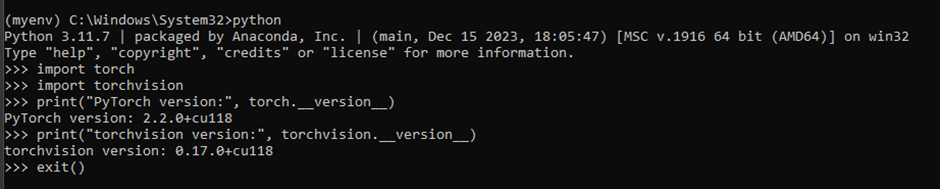

* First I was using Juptyer Notebook but the enviroment was very slow to run, so I switched to VSCode and added my enviroment to VSCode as it is easy to do so.

In [ ]:
#This shows that YOLOv8 can now train on the GPU and the enviroment is offically set up.
import torch

# Check if CUDA (GPU support) is available
if torch.cuda.is_available():
    # Get the number of available GPUs
    print(torch.cuda.device_count(), "GPU(s) available.")
    # Print the name of the current GPU
    print("GPU:", torch.cuda.get_device_name(0))
else:
    print("CUDA is not available. Training will be performed on CPU.")

## Pre-Processing and Augmentation
Pre-processing and Augmentation was done on Roboflow but first the dataset needed to be labelled or the dataset would bave to be manually annotated.

Here is the code I used to label my dataset:

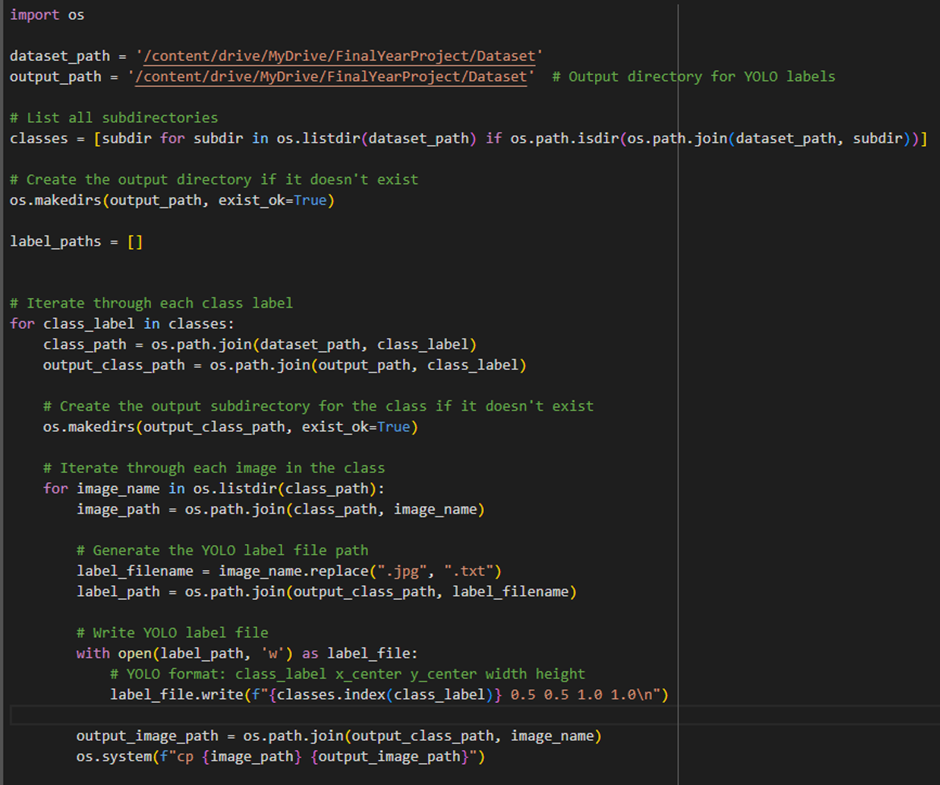

This automatically labels my dataset by looping through the dataset images then creating a txt file that labels the image either a Structural-Crack or No-Structural-Crack.

Note: The reason it is not in this file is because it was done on Google Colab originally in a different file.

After the dataset was labelled it was time to pick Pre-Processing and Augmentation techniques. Here are the techniques I chose:

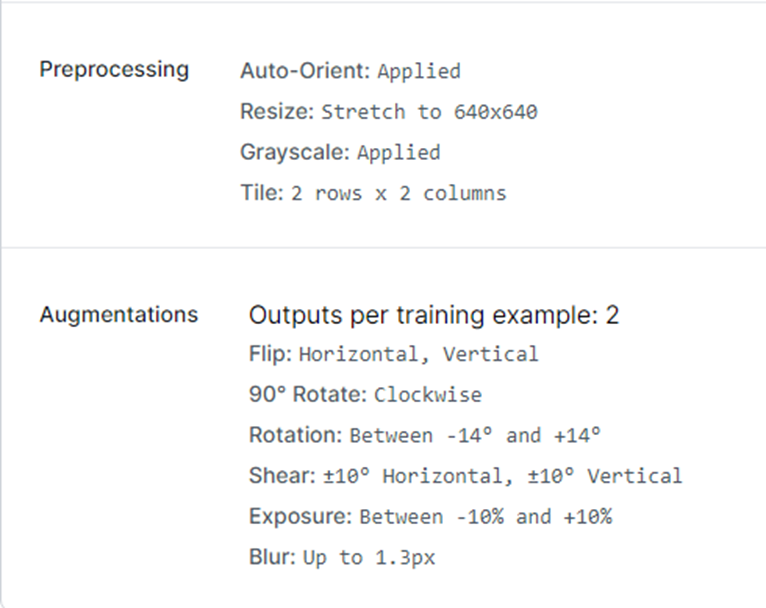

## YOLOv8 Training Model
After I downloaded the dataset in YOLOv8 format it is time to train the model. This dataset is massive and can take a long time to train. 

In [ ]:
import torch
import ultralytics as ultralytics
from ultralytics import YOLO, utils
from IPython.display import Image
ultralytics.checks()

## 1 EPOCH Training and Results
* 1 EPOCH training was just to test how YOLOv8 trains locally. How it runs on my PC and is there any specs slowing down the training.
* It seems that my RAM is capped, although its still training at a good pace. It is being limited RAM.

The training was first done on Jupyter Notebook however, moved to VSCode because the enviroment on Jupyter Notebook was freezing and slower overall. Because of this the YOLOv8 training was not saved but a screenshot below showing how the results of training:

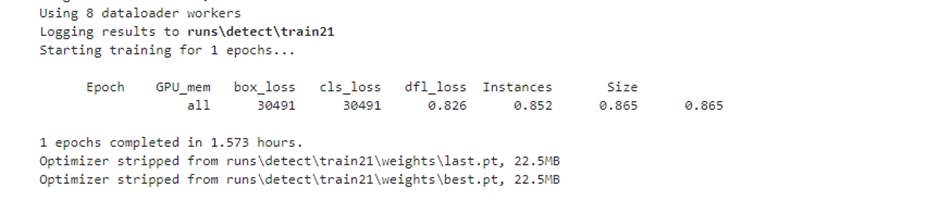

I will be going up in increments of 5 until hopefully a convergence is met, if not I will be going up in increments until training takes to long and can't be done anymore.

## 1 EPOCH Structural Crack Detection

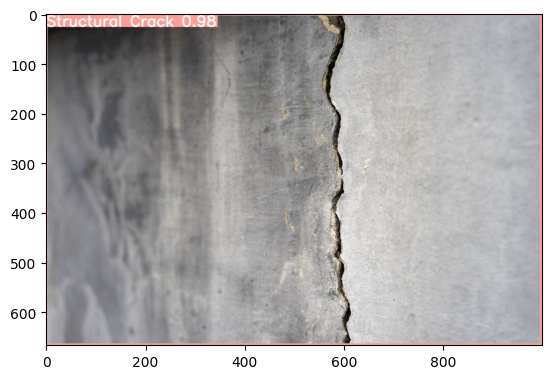

In [1]:
from matplotlib import pyplot as plt
from PIL import Image

img = Image.open('C:/00FinalYearProject/runs/detect/1EpochYOLOv8 Detection/crack1.jpg')
plt.imshow(img)
plt.show()

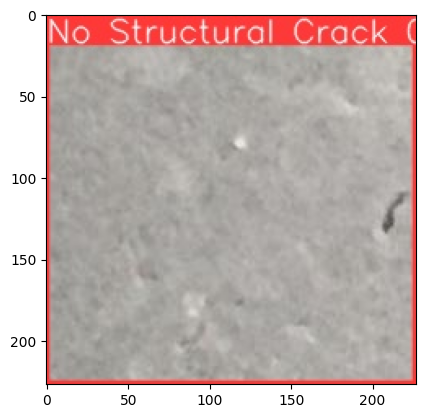

In [2]:
img = Image.open('C:/00FinalYearProject/runs/detect/1EpochYOLOv8 Detection/00001.jpg')
plt.imshow(img)
plt.show()

## 1 EPOCH Results and Evaluation

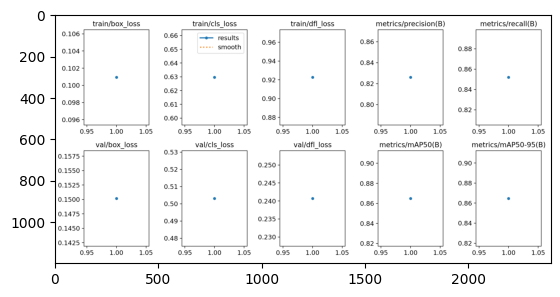

In [4]:
img = Image.open('C:/Windows/System32/runs/detect/YOLOv8 1 epoch training results/results.png')
plt.imshow(img)
plt.show()

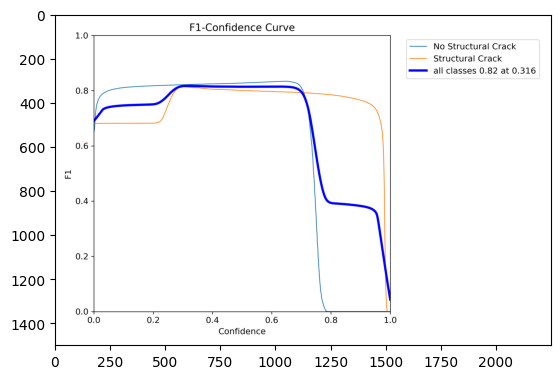

In [5]:
img = Image.open('C:/Windows/System32/runs/detect/YOLOv8 1 epoch training results/F1_curve.png')
plt.imshow(img)
plt.show()

The F1 score for 1 EPOCH all classes remails stable until it reaches a confidence of 0.8 (80%) were it then sharply drops. The No Structural Crack Starts high but drops sharply as well but unlike all classes line it completely drops at 0.8 meaning the confidence threshold is capped at 0.8. The Structural Crack line shows a good F1 score across all confidence thresholds but sharply descends very close to 1.0 (100%). 

## 5 EPOCH Training 

* For 5 epoch training the model results did not save meaning evaluation of the model could not be done.
* However, the models training time was saved, see image below:

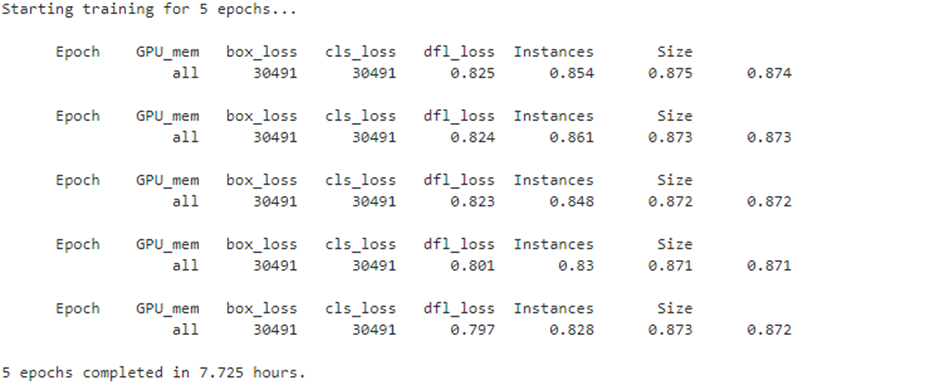

The downward trend in the 5 EPOCH metrics above indicate that the model is improving its predictions for both locating and classifying structural and non-structural cracks. Performance metrics cannot be done for this evaluation as after the model completed training these results failed to load and no longer exist

## 5 EPOCH Detection

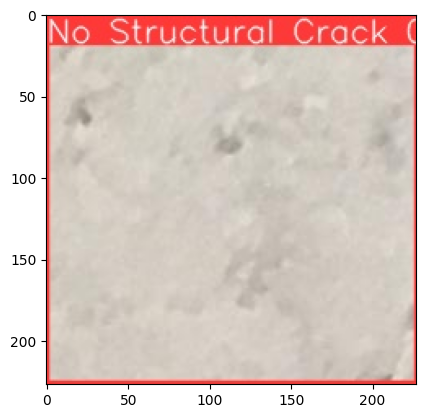

In [6]:
img = Image.open('C:/00FinalYearProject/runs/detect/5EpochYOLOv8 Detection/00002.jpg')
plt.imshow(img)
plt.show()

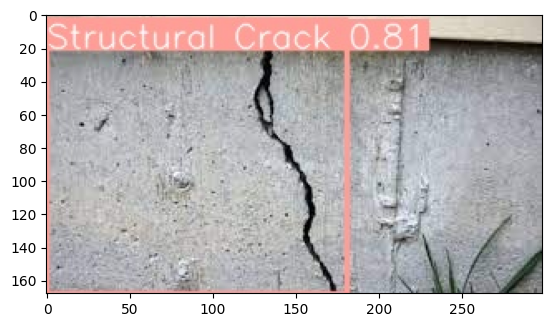

In [7]:
img = Image.open('C:/00FinalYearProject/runs/detect/5EpochYOLOv8 Detection/crack2.jpg')
plt.imshow(img)
plt.show()

## 10 EPOCH Training

In [ ]:
#I download the dataset from roboflow and in the Roboflow it allows you to download it in YOLOv8 format.
# After importing ultralitics and cloning the YOLOv8 repo I use this command with the path to my dataset to train the model.
!yolo task=detect device="cuda:0" mode=train model=yolov8s.pt data="E:\Final Year Project.v3i.yolov8\data.yaml" epochs=10 imgsz=650 plots=True

This is the 10 Epoch training and image size and batch size will stay the same since model training time was not that long for 5 epochs.

## 10 EPOCH Prediction

In [ ]:
!yolo predict model=yolov8n.pt model="C:\Windows\System32\00FinalYearProject\runs\detect\10EpochTrain\weights\best.pt" conf=0.60 source="C:/Users/aaron/OneDrive/Desktop/test_images"

I've set the confidence interval to 60 just so it can still perform detections bult also fairly accurate detections and blocking out any detetions it would make on lower confidences.

## 10 EPOCH Structural Crack Detection

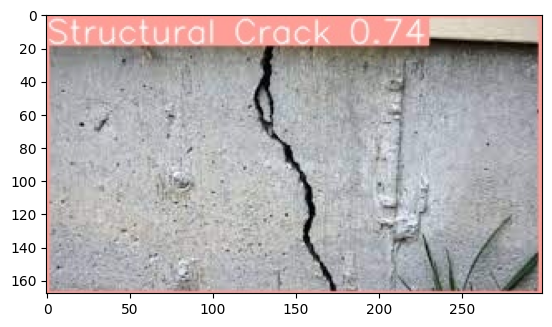

In [8]:
img = Image.open('C:/00FinalYearProject/runs/detect/10EpochYOLOv8 Detection/crack2.jpg')
plt.imshow(img)
plt.show()

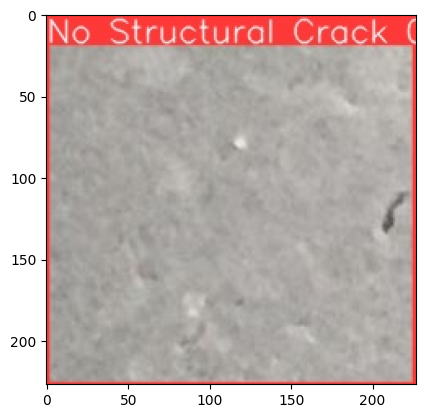

In [9]:
img = Image.open('C:/00FinalYearProject/runs/detect/10EpochYOLOv8 Detection/00001.jpg')
plt.imshow(img)
plt.show()

## 10 EPOCHS results and Evaluation

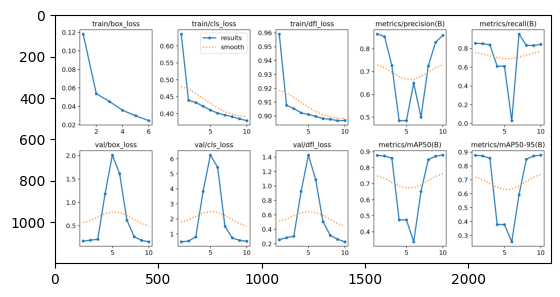

In [10]:
from matplotlib import pyplot as plt
from PIL import Image

img = Image.open('C:/Windows/System32/00FinalYearProject/runs/detect/10EpochTrain/results.png')
plt.imshow(img)
plt.show()

Precision fluctuates in the 5 EPOCHS but eventually goes upward meaning the model is making more accurate predictions as the training progresses. Recall is volatile meaning there is variability in the model’s ability to detect all instances, mAP50 stays above 0.7 which is good, and the model has a decent average precision. 

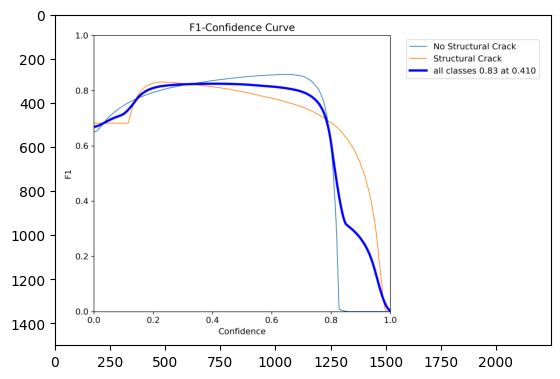

In [11]:
img = Image.open('C:/Windows/System32/00FinalYearProject/runs/detect/10EpochTrain/F1_curve.png')
plt.imshow(img)
plt.show()

The F1 score for all classes (No Structural crack, Structural Crack, all classes) starts high around the 0.8 mark and all classes are stable until they approach a confidence level of between 0.8 and 1. The combined F1-score for all classes peaks at 0.83 at a confidence level of 0.4 meaning that is where the model achieves the best balance between precision and recall. 

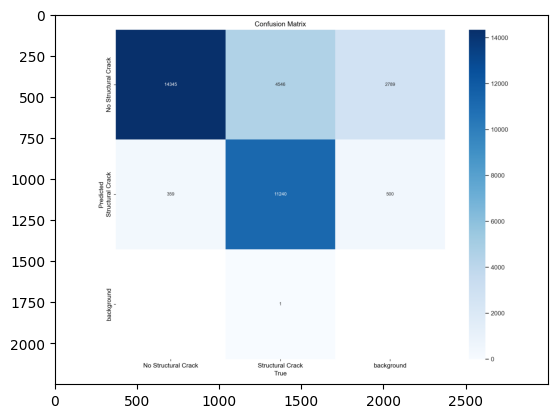

In [12]:
img = Image.open('C:/Windows/System32/00FinalYearProject/runs/detect/10EpochTrain/confusion_matrix.png')
plt.imshow(img)
plt.show()

For 10 EPOCHS there is a higher for both true positives and false negatives for structural crack and non-structural crack classes indicating that the model has very good predicative capabilities. However, the 10 epoch model struggles with distinguishing no structural crack from background, this means that the model does not have enough background instances to learn from. Even with this issue, the model shows good predictive power for crack detection.

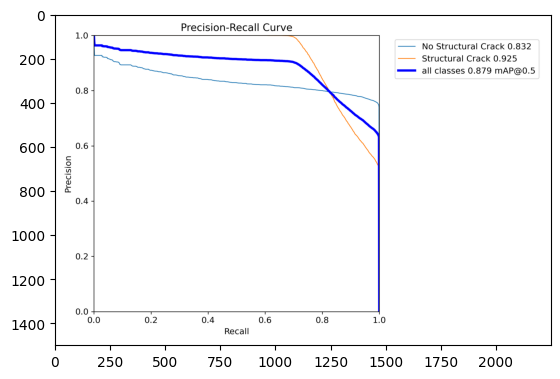

In [13]:
img = Image.open('C:/Windows/System32/00FinalYearProject/runs/detect/10EpochTrain/PR_curve.png')
plt.imshow(img)
plt.show()

The Precision-Recall Curve shows a slight drop in precision when recall is increased. However the results form this 10 EPOCH PR Curve shows that the model is accurate and precise

## 15 EPOCH Training

In [ ]:
!yolo task=detect device="cuda:0" mode=train model=yolov8s.pt data="E:\Final Year Project.v3i.yolov8\data.yaml" epochs=15 imgsz=650 plots=True

 This will be that last YOLOv8 training done as it is now taking up to much of the schedule of the project.Because of the limitations of the computer and the electrity and heat these models generate training will have to stop after 15 epochs. I did not change image size or batch size as I didn't want to effect the models performance. 

## 15 EPOCH Prediction

In [ ]:
!yolo predict model=yolov8n.pt model="C:\Windows\System32\00FinalYearProject\runs\detect\15EpochTrain\weights\best.pt" conf=0.60 source="C:/Users/aaron/OneDrive/Desktop/test_images"

Detection alo the same as 10 Epoch one, were I've left the detections at a confidence Interval of 60 as the model has still not met convergence so the it will stay the same.

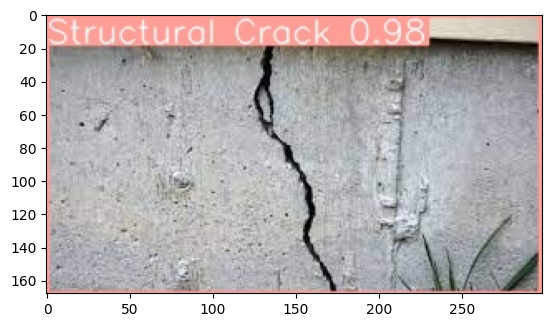

In [14]:
img = Image.open('C:/00FinalYearProject/runs/detect/15EpochYOLOv8 Detection 2/crack2.jpg')
plt.imshow(img)
plt.show()

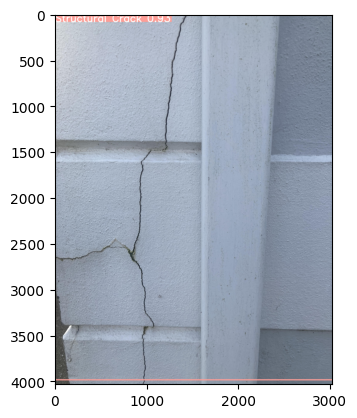

In [16]:
img = Image.open('C:/00FinalYearProject/runs/detect/15EpochYOLOv8 Detection 2/MICA Crack detection 1.jpg')
plt.imshow(img)
plt.show()

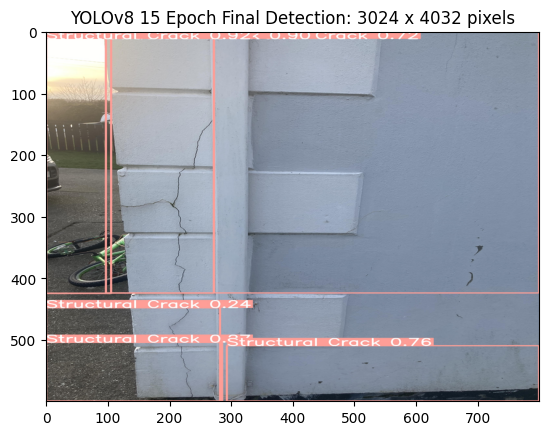

In [18]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('C:/00FinalYearProject/runs/detect/15EpochYOLOv8 Detection 2/MICA Crack detection 4.jpg')
size = (800, 600)

resized_img = img.resize(size, Image.Resampling.LANCZOS)
plt.imshow(resized_img)
plt.title(f'YOLOv8 15 Epoch Final Detection: {img.size[0]} x {img.size[1]} pixels')  # Adds the image size to the plot title
plt.show()

## 15 Epoch Results

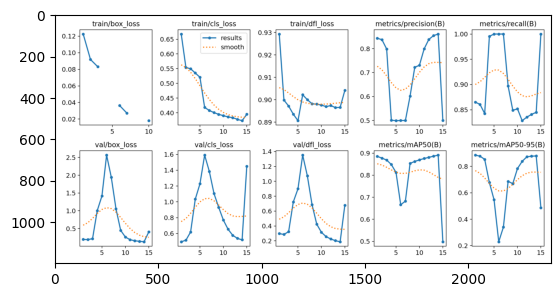

In [19]:
img = Image.open('C:/Windows/System32/00FinalYearProject/runs/detect/15EpochTrain/results.png')
plt.imshow(img)
plt.show()

* For training losses, both Box loss and Class Loss decrease indicated an improved accuracy in bounding box predictions and classifications. DFL Loss Is stable with a small upward trend at the end which could be because of some difficulties in localization as training the model progressed. For validation losses Box Loss and Class loss both have a spike which could be either over-fitting or variability in the validation set.
* For the performance metrics, Precision shows improvement overtime but is also fluctuating meaning the model is performing well but it might not be stable at times. Recall graph indicates that there is high variability meaning the model is not consistent at finding all positives. The mAP50 has increased but does drop in the middle meaning that the prediction is improving but like the recall indicates it might be slightly inconsistent at times and the mAP50-95 graph is the same as mAP50.

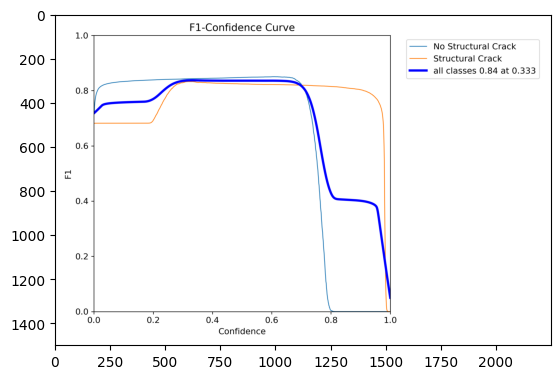

In [20]:
img = Image.open('C:/Windows/System32/00FinalYearProject/runs/detect/15EpochTrain/F1_curve.png')
plt.imshow(img)
plt.show()

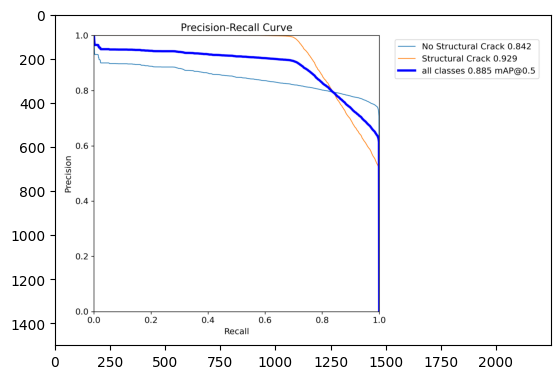

In [21]:
img = Image.open('C:/Windows/System32/00FinalYearProject/runs/detect/15EpochTrain/PR_curve.png')
plt.imshow(img)
plt.show()

## Final Results Interpretation
Although there is evidence that the model is learning, the model has not yet met convergence due to the model being unstable at times during training. This is  were there is spikes in validation loss and variability in the performance metrics. For a model to meet convergence the loss should be lower to a point of stability and the performance metrics also reach that level of consistency that is acceptable level of performance.